In [69]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from datetime import datetime
import itertools as iter
from config import consumer_key, API_secret, access_token, token_secret

In [70]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [71]:
# Twitter API Keys
consumer_key = consumer_key
API_secret = API_secret
access_token = access_token
token_secret = token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, API_secret)
auth.set_access_token(access_token, token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [72]:
# Target Account
target_users = ["@CNN", "@BBC", "@CBS", "@FoxNews", "@nytimes"]
sentiments = []


for target_user in target_users:
    counter = 1

#loop through 5 pages of tweets - 100 total for each news outlet
    for x in range(5):
        
        public_tweets = api.user_timeline(target_user, page=x+1)
        
        #loop though tweets
        for tweet in public_tweets:
            
            #run vader analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                            "Media Source" : target_user})
            
            counter = counter+1

In [73]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,0.2732,Mon Apr 09 22:08:33 +0000 2018,@CNN,0.913,0.000,0.087,1
1,0.5267,Mon Apr 09 22:07:14 +0000 2018,@CNN,0.833,0.000,0.167,2
2,0.8176,Mon Apr 09 22:04:38 +0000 2018,@CNN,0.615,0.000,0.385,3
3,0.0000,Mon Apr 09 21:54:58 +0000 2018,@CNN,1.000,0.000,0.000,4
4,-0.5574,Mon Apr 09 21:39:04 +0000 2018,@CNN,0.854,0.146,0.000,5


Text(0.5,1,'Tweet Sentiment over past 100 Tweets')

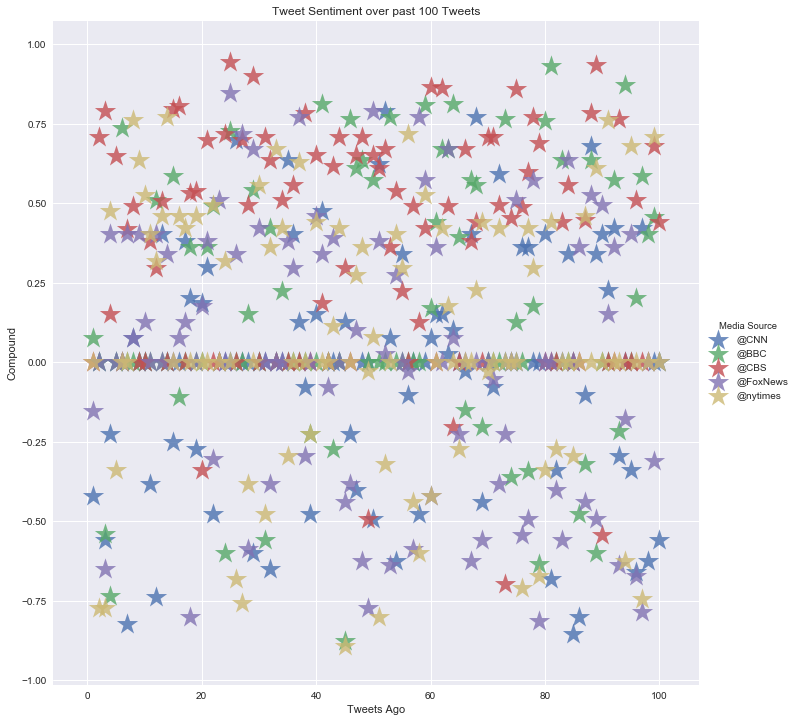

In [67]:
#create scatterplot of tweet semtiment 
sns.set()
sns.lmplot( x="Tweets Ago", y="Compound", data=sentiments_pd, fit_reg=False, markers="*", 
           size=10, hue="Media Source", legend=True, scatter_kws={"s": 500})
plt.title("Tweet Sentiment over past 100 Tweets")

In [58]:
#create dataframes with each news outlet (used for the aggregate compound sentiment scores in the bar chart)
cnn_sentiments_df = sentiments_pd.loc[sentiments_pd["Media Source"] == "@CNN"]
bbc_sentiments_df = sentiments_pd.loc[sentiments_pd["Media Source"] == "@BBC"]
cbs_sentiments_df = sentiments_pd.loc[sentiments_pd["Media Source"] == "@CBS"]
foxnews_sentiments_df = sentiments_pd.loc[sentiments_pd["Media Source"] == "@FoxNews"]
nytimes_sentiments_df = sentiments_pd.loc[sentiments_pd["Media Source"] == "@nytimes"]

In [38]:
#identify aggregate compound sentiment score for each news outlet
cnn_agg = round((cnn_sentiments_df["Compound"].sum()/20),2)   
bbc_agg = round((bbc_sentiments_df["Compound"].sum()/20),2)   
cbs_agg = round((cbs_sentiments_df["Compound"].sum()/20),2)   
nytimes_agg = round((nytimes_sentiments_df["Compound"].sum()/20),2)   
foxnews_agg = round((foxnews_sentiments_df["Compound"].sum()/20),2)

<Container object of 5 artists>

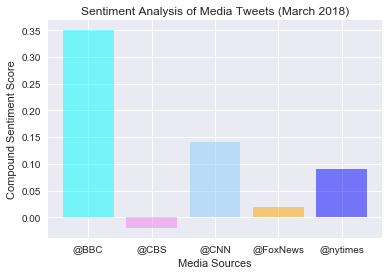

In [39]:
#Create bar graph showing compound sentiment scores
sns.set()

x = sentiments_pd["Media Source"].unique()
#x = np.arange(len(y))
#y = [cnn_agg, bbc_agg, cbs_agg, nytimes_agg, foxnews_agg]
y = round((sentiments_pd.groupby(["Media Source"])["Compound"].mean()),2)

plt.title("Sentiment Analysis of Media Tweets (March 2018)")
plt.xlabel("Media Sources")
plt.ylabel("Compound Sentiment Score")

plt.bar(x, y, color=["lightskyblue", "aqua", "violet", "orange", "blue"], alpha=0.5, align="center")